In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)
!pip install certifi chardet click easydict h5py~=2.7 intel-openmp imgaug ipython ipython-genutils matplotlib==3.0.3 moviepy numpy==1.16.4 opencv-python~=3.4 pandas patsy 
!pip install python-dateutil pyyaml>=5.1 requests ruamel.yaml~=0.15 setuptools scikit-image scikit-learn scipy six statsmodels tables tensorpack>=0.9.7.1 tqdm wheel blend-modes
%tensorflow_version 1.x
import numpy as np
import time
import sys
import os
import importlib

from IPython.display import HTML, display
def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

from google.colab import output
def alert_done():
  output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/b/bd/Bienenkorbglocke.1133.Hz.ogg").play()')

os.environ["DLClight"]="True"
%cd drive/My\ Drive/Development/DeepLabCut
import deeplabcut
from deadROMM import possumPolish

alert_done()

Mounted at /content/drive
     |████████████████████████████████| 13.0MB 239kB/s 
     |████████████████████████████████| 17.3MB 196kB/s 
     |████████████████████████████████| 49.1MB 61kB/s 
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.16.4 which is incompatible.
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.3 which is incompatible.
ERROR: mizani 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


TensorFlow 1.x selected.
/content/drive/My Drive/Development/DeepLabCut
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
bp_list = model.swapFeaturesHdf(r'./dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_diff/CollectedData_Phil_backup.h5', swap=False, cross=True)
model.swapCrossPoseCfgs(
    r'./dev/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-5/possum101_11AprApr13-trainset95shuffle1/train/pose_cfg.yaml',
    r'./dev/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-5/possum101_11AprApr13-trainset95shuffle1/test/pose_cfg.yaml',
    bp_list
)
model.dlc.create_training_dataset(model.yaml)

Creating cam1-cam2-crossed synthetic markers
['cx_Body_ds1_crn_cam1x2_X', 'cx_Body_ds1_crn_cam1x2_Y', 'cx_Body_ds2_int_cam1x2_X', 'cx_Body_ds2_int_cam1x2_Y', 'cx_Body_ds3_cdl_cam1x2_X', 'cx_Body_ds3_cdl_cam1x2_Y', 'cx_Body_vn1_crn_cam1x2_X', 'cx_Body_vn1_crn_cam1x2_Y', 'cx_Body_vn2_int_cam1x2_X', 'cx_Body_vn2_int_cam1x2_Y', 'cx_Body_vn3_cdl_cam1x2_X', 'cx_Body_vn3_cdl_cam1x2_Y', 'cx_Scapula_acr_cam1x2_X', 'cx_Scapula_acr_cam1x2_Y', 'cx_Scapula_spi_cam1x2_X', 'cx_Scapula_spi_cam1x2_Y', 'cx_Scapula_vtb_cam1x2_X', 'cx_Scapula_vtb_cam1x2_Y', 'cx_Humerus_dpc_cam1x2_X', 'cx_Humerus_dpc_cam1x2_Y', 'cx_Humerus_ent_cam1x2_X', 'cx_Humerus_ent_cam1x2_Y', 'cx_Humerus_ect_cam1x2_X', 'cx_Humerus_ect_cam1x2_Y', 'cx_Ulna_olc_cam1x2_X', 'cx_Ulna_olc_cam1x2_Y', 'cx_Ulna_int_cam1x2_X', 'cx_Ulna_int_cam1x2_Y', 'cx_Ulna_dst_cam1x2_X', 'cx_Ulna_dst_cam1x2_Y', 'cx_Radius_prx_cam1x2_X', 'cx_Radius_prx_cam1x2_Y', 'cx_Radius_int_cam1x2_X', 'cx_Radius_int_cam1x2_Y', 'cx_Radius_dst_cam1x2_X', 'cx_Radius_dst_cam1x

/content/drive/My Drive/Development/DeepLabCut/deadROMM/possumPolish.py:283: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  self.config = ruamel.yaml.load(open(self.yaml))


Updated config.yaml with event cross at 23Sep20_16h38m25s
Successfully generated synthetic features; saved ./dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_diff/CollectedData_Phil_backup_cross.h5, ./dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_diff/CollectedData_Phil_backup_cross23Sep20_16h38m25s.h5, and ./dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_diff/CollectedData_Phil_backup_cross_23Sep20_16h38m25s.csv


In [2]:
root = '/content/drive/My Drive/Development/DeepLabCut'

importlib.reload(possumPolish)
model = possumPolish.Project()

# config_path = model.load('./deadROMM/profiles-colab.yaml','dv92', './dev/demo_blank_dv92_biceps_3pec_delt/config.yaml') #demo

# config_path = model.load('./deadROMM/profiles-colab.yaml','dv101right', './dev/possum101right_biceps_triceps-Phil-2020-06-08/config.yaml') #101R
# config_path = model.load('./deadROMM/profiles-colab.yaml','dv101left', './dev/possum101_11Apr-Phil-2020-04-13-diff/config.yaml') #101L

config_path = model.load('./deadROMM/profiles-colab.yaml','dv92', './dev/dv92_biceps_3pec_delt-Phil-2020-06-09/config.yaml') #92
# config_path = model.load('./deadROMM/profiles-colab.yaml','dv85left', './dev/dv85_left_biceps_teres_lat-Phil-2020-06-09/config.yaml') #85L
# config_path = model.load('./deadROMM/profiles-colab.yaml','dv85right', './dev/dv85_right_triceps_lat-Phil-2020-06-09/config.yaml') #85R
# config_path = model.load('./deadROMM/profiles-colab.yaml','dv88left', './dev/dv88_left_teresmaj_pec-Phil-2020-06-09/config.yaml') #88L
# config_path = model.load('./deadROMM/profiles-colab.yaml','dv88right', './dev/dv88_trilong_pec-Phil-2020-06-09/config.yaml') #88R
# config_path = model.load('./deadROMM/profiles-colab.yaml','sm105', './dev/sm105-Phil-2020-06-09/config.yaml') #105
# config_path = model.load('./deadROMM/profiles-colab.yaml','sm108', './dev/sm108-Phil-2020-06-09/config.yaml') #108
# config_path = model.load('./deadROMM/profiles-colab.yaml','sm126', './dev/sm126-Phil-2020-06-09/config.yaml') #126

# model.importXma(next(iter(model.config['history'].keys())))  #e.g. './dev/dv92_biceps...' no quotes
# model.dlc.create_training_dataset(model.yaml)

alert_done()

/content/drive/My Drive/Development/DeepLabCut/deadROMM/possumPolish.py:173: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  profiles = ruamel.yaml.load(open(self.profile_path))


Loaded profile dv92
Generated absolute paths to project directories
Successfully loaded profile dv92


In [6]:
model.config

{'Task': 'dv92_biceps_3pec_delt',
 'TrainingFraction': [0.95],
 'alphavalue': 0.7,
 'batch_size': 8,
 'bodyparts': ['Body_ds1_crn_cam1',
  'Body_ds1_crn_cam2',
  'Body_ds3_cdl_cam1',
  'Body_ds3_cdl_cam2',
  'Body_vn1_crn_cam1',
  'Body_vn1_crn_cam2',
  'Body_vn2_int_cam1',
  'Body_vn2_int_cam2',
  'Body_vn3_cdl_cam1',
  'Body_vn3_cdl_cam2',
  'Scapula_acr_cam1',
  'Scapula_acr_cam2',
  'Scapula_spi_cam1',
  'Scapula_spi_cam2',
  'Scapula_vtb_cam1',
  'Scapula_vtb_cam2',
  'Humerus_dpc_cam1',
  'Humerus_dpc_cam2',
  'Humerus_ent_cam1',
  'Humerus_ent_cam2',
  'Humerus_ect_cam1',
  'Humerus_ect_cam2',
  'Ulna_olc_cam1',
  'Ulna_olc_cam2',
  'Ulna_int_cam1',
  'Ulna_int_cam2',
  'Ulna_dst_cam1',
  'Ulna_dst_cam2',
  'Radius_prx_cam1',
  'Radius_prx_cam2',
  'Radius_int_cam1',
  'Radius_int_cam2',
  'Radius_dst_cam1',
  'Radius_dst_cam2',
  'Biceps_prox_cam1',
  'Biceps_prox_cam2',
  'Biceps_dist_cam1',
  'Biceps_dist_cam2',
  'Scapula_acc_cam1',
  'Scapula_acc_cam2',
  'Ulna_acc_cam1',
 

### After digitizing outliers:
1.   Import digitized 2D points to DeepLabCut. Specify any undigitizable frames (by their index in the entire stack, see filename) so DeepLabCut knows to ignore them. Don't forget the outlier_mode flag! Possumpolish will drop the undigitizable frames from the csv file





In [7]:
model.importXma('30Jul20_19h57m27s','./dev/dv92_biceps_3pec_delt-Phil-2020-06-09/xma/outliers1.csv',outlier_mode=True, indices_to_drop=[]) # point to the match_outliers event in config with the correct outlier frames

Output hidden; open in https://colab.research.google.com to view.

2. Make sure to check your labels to make sure everything was imported correctly

In [8]:
model.dlc.check_labels(model.yaml)

Creating images with labels by Phil.
/content/drive/My Drive/Development/DeepLabCut/dev/dv92_biceps_3pec_delt-Phil-2020-06-09/labeled-data/5Apr_diff_labeled  already exists!
They are stored in the following folder: /content/drive/My Drive/Development/DeepLabCut/dev/dv92_biceps_3pec_delt-Phil-2020-06-09/labeled-data/5Apr_diff_labeled.
If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


Increment iteration and retrain

In [ ]:
trainposeconfigfile,testposeconfigfile,snapshotfolder=model.dlc.return_train_network_path(config_path,1,0.95)
cfg_dlc=model.dlc.auxiliaryfunctions.read_plainconfig(trainposeconfigfile)
cfg_dlc['augmentationprobability']=0.25
cfg_dlc['batch_size']=4
cfg_dlc['hist_eq']=True
cfg_dlc['gamma']=True
cfg_dlc['logcontrast']=True
cfg_dlc['allchannelsclahe']=True
# cfg_dlc['optimizer'] ="sgd"
cfg_dlc['dataset_type']='imgaug'
# cfg_dlc['multi_step']=[[1e-4, 7500], [5*1e-5, 12000], [1e-5, 50000], [5e-6, 200000]]
# cfg_dlc['global_scale']=1.0
cfg_dlc['scale_jitter_lo'] = 0.8
cfg_dlc['scale_jitter_up'] = 1.2
cfg_dlc['global_scale'] = 0.8
cfg_dlc['net_type']= 'resnet_50'


cfg_dlc['elastic_transform']=True
cfg_dlc['rotation']=180
cfg_dlc['covering']=True
cfg_dlc['motion_blur'] = True


# cfg_dlc['init_weights']= '/content/drive/My Drive/Development/DeepLabCut/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt'
# cfg_dlc['init_weights']= '/content/drive/My Drive/Development/DeepLabCut/deeplabcut/pose_estimation_tensorflow/models/pretrained/mobilenet_v2_1.0_224.ckpt'
# cfg_dlc['init_weights']=model.getLatestSnapshot(snapshotfolder) # to resume from latest snapshot
# cfg_dlc['init_weights']= '/content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-5/possum101_11AprApr13-trainset95shuffle1/train/snapshot-70000'
# cfg_dlc['init_weights']= '/content/drive/My Drive/Development/DeepLabCut/dev/possum101right_biceps_triceps-Phil-2020-06-08/dlc-models/iteration-0/possum101right_biceps_tricepsJun8-trainset95shuffle1/train/snapshot-20000'
cfg_dlc['init_weights']= '/content/drive/My Drive/Development/DeepLabCut/dev/dv92_biceps_3pec_delt-Phil-2020-06-09/dlc-models/iteration-0/dv92_biceps_3pec_deltJun9-trainset95shuffle1/train/snapshot-90000'



model.dlc.auxiliaryfunctions.write_plainconfig(trainposeconfigfile,cfg_dlc)
model.dlc.train_network(config_path, saveiters=10000,displayiters=50,maxiters=500000,max_snapshots_to_keep=15, allow_growth=True)

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18],
                [19],
                [20],
                [21],
                [22],
                [23],
                [24],
                [25],
                [26],
                [27],
                [28],
                [29],
                [30],
                [31],
                [32],
                [33],
                [34],
                [35],
                [36],
                [37],
                [38],
                [39],
                [40],
                [41]],
 'all_joints_names': ['Body_ds1_crn_cam1',
                      'Body_ds1_cr

Starting with imgaug pose-dataset loader.
Batch Size is 4
Initializing ResNet
Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
Loading already trained DLC with backbone: resnet_50

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Development/DeepLabCut/dev/dv92_biceps_3pec_delt-Phil-2020-06-09/dlc-models/iteration-0/dv92_biceps_3pec_deltJun9-trainset95shuffle1/train/snapshot-90000
Max_iters overwritten as 500000
Display_iters overwritten as 50
Save_iters overwritten as 10000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'weigh_only_present_joints': False, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/content/drive/My Drive/Development/DeepLabCut/dev/dv92_biceps_3pec_delt-Phil-2020-06-09/dlc-models/iter

iteration: 50 loss: 0.0054 lr: 0.005
iteration: 100 loss: 0.0051 lr: 0.005
iteration: 150 loss: 0.0049 lr: 0.005
iteration: 200 loss: 0.0048 lr: 0.005
iteration: 250 loss: 0.0054 lr: 0.005
iteration: 300 loss: 0.0049 lr: 0.005
iteration: 350 loss: 0.0052 lr: 0.005
iteration: 400 loss: 0.0053 lr: 0.005
iteration: 450 loss: 0.0055 lr: 0.005
iteration: 500 loss: 0.0053 lr: 0.005
iteration: 550 loss: 0.0050 lr: 0.005
iteration: 600 loss: 0.0051 lr: 0.005
iteration: 650 loss: 0.0053 lr: 0.005
iteration: 700 loss: 0.0055 lr: 0.005
iteration: 750 loss: 0.0051 lr: 0.005
iteration: 800 loss: 0.0050 lr: 0.005
iteration: 850 loss: 0.0052 lr: 0.005
iteration: 900 loss: 0.0049 lr: 0.005
iteration: 950 loss: 0.0051 lr: 0.005
iteration: 1000 loss: 0.0049 lr: 0.005
iteration: 1050 loss: 0.0057 lr: 0.005
iteration: 1100 loss: 0.0050 lr: 0.005
iteration: 1150 loss: 0.0052 lr: 0.005
iteration: 1200 loss: 0.0049 lr: 0.005
iteration: 1250 loss: 0.0054 lr: 0.005
iteration: 1300 loss: 0.0052 lr: 0.005
iterat

## After training: get outliers

In [ ]:
# model.evaluateAndAnalyze()
model.getOutliers(20, outlier_algo='jump') 
alert_done()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# model.splitDlc2Xma('./dev/possum101right_biceps_triceps-Phil-2020-06-08/labeled-data/16Apr_diff/machinelabels-iter0.h5', model.markers, model.config['history']['06Oct20_14h35m03s']['files']+model.config['history']['06Oct20_14h36m13s']['files'])
model.cleanup(['06Oct20_15h11m40s','06Oct20_15h10m33s','06Oct20_15h09m25s'])
# model.config

/content/drive/My Drive/Development/DeepLabCut/deadROMM/possumPolish.py:382: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  self.config = ruamel.yaml.load(open(self.yaml))


Deleted 66 files associated with operation match_outliers at 06Oct20_15h11m40s
Deleted directory  ./dev/possum101right_biceps_triceps-Phil-2020-06-08/frames-for-xmalab/c1_16Apr_outlier_06Oct20_15h11m40s
Deleted directory  ./dev/possum101right_biceps_triceps-Phil-2020-06-08/frames-for-xmalab/c2_16Apr_outlier_06Oct20_15h11m40s
Deleted 16 files associated with operation outliers_cam2 at 06Oct20_15h10m33s
Deleted 17 files associated with operation outliers_cam1 at 06Oct20_15h09m25s


## Digitizing instructions
* This XMA file contains multiple "trials". Each "trial" represents one bout of DeepLabCut training (30-40 frames). Markers and rigidbodies stay constant from trial to trial, so you can always refer back to an already-digitized trial to confirm marker identities.
* Each trial uses a .PNG stack instead of a video. In case you need to relink, PNGs are located in the "frames-for-xmalab" folder, within individual timestamped folders. Later timestamp = later round of digitizing. Undistortion grids and calibration images are located within the folder named "xma".
* For simpler file logistics, let's only pass .CSVs with digitizing data and metadata back and forth—it's likely that we'll have to relink some file references going from Mac to PC, and XMALab doesn't handle loading errors well.
* Please export "pre" and "post" Precision Info .CSVs before and after you digitize, for documentation purposes. Please also keep track of the time you spend on each trial (rounded to the nearest 10-15 minutes, not counting breaks)
* My usual workflow is to set the plot to Rigid Body Error and skip to the biggest spikes first, then gradually work downwards from there. Distal segments typically have more error than proximal ones. Do the muscle markers last, as you won't be able to use RB error to nail them down.
* Some frames will be undigitizable due to high reprojection error (the c-arm cameras occasionally lose sync). Please do not digitize any markers for these frames; instead write down the frame number. Remember: Garbage In Garbage Out is the rule for machine learning. If a frame seems bad just skip it and make a note of it.
* Once I'm happy with my overall error, I like to do a final pass in the 3D world view to make sure the locations of the muscle markers make sense.
* Any feedback on these instructions is extremely welcome!

## Checklist
1. "pre-" Precision Info .CSV
2. Exported 2D points distorted) .CSV 
3. "post-" Precision Info .CSV
4. Time taken
5. Undigitizable frames




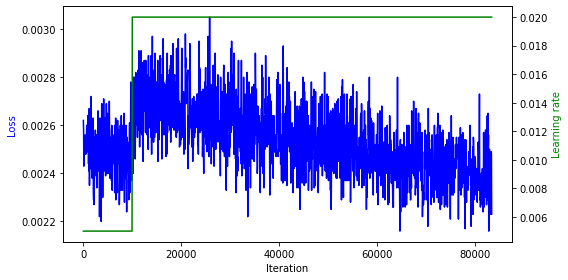


/content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/evaluation-results/  already exists!
/content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/evaluation-results/iteration-5/possum101_11AprApr13-trainset95shuffle1  already exists!
Running  DLC_resnet50_possum101_11AprApr13shuffle1_80000  with # of trainingiterations: 80000
Initializing ResNet
Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Please use `layer.__call__` method instead.


INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-5/possum101_11AprApr13-trainset95shuffle1/train/snapshot-80000


INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-5/possum101_11AprApr13-trainset95shuffle1/train/snapshot-80000
0it [00:00, ?it/s]

Analyzing data...


150it [01:21,  1.83it/s]
  0%|          | 0/150 [00:00<?, ?it/s]

Done and results stored for snapshot:  snapshot-80000
Results for 80000  training iterations: 95 1 train error: 105456.04 pixels. Test error: 103638.2  pixels.
With pcutoff of 0.1  train error: 2.3 pixels. Test error: 2.37 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...
/content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/evaluation-results/iteration-5/possum101_11AprApr13-trainset95shuffle1/LabeledImages_DLC_resnet50_possum101_11AprApr13shuffle1_80000_snapshot-80000  already exists!


100%|██████████| 150/150 [03:24<00:00,  1.37s/it]
/content/drive/My Drive/Development/DeepLabCut/deadROMM/possumPolish.py:283: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  self.config = ruamel.yaml.load(open(self.yaml))


The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
If it generalizes well, choose the best model for prediction and update the config file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise consider retraining the network (see DeepLabCut workflow Fig 2)
Function <function evaluate_network at 0x7fd1ec5f7510> created 2 new files in directory ./dev/possum101_11Apr-Phil-2020-04-13-diff/evaluation-results
Updated config.yaml with event evaluation at 01Oct20_15h10m56s
Using snapshot-80000 for model /content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-5/possum101_11AprApr13-trainset95shuffle1



Initializing ResNet



INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-5/possum101_11AprApr13-trainset95shuffle1/train/snapshot-80000


INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-5/possum101_11AprApr13-trainset95shuffle1/train/snapshot-80000


Starting to analyze %  ./videos/11Apr_diff.mp4
Loading  ./videos/11Apr_diff.mp4


  0%|          | 0/7904 [00:00<?, ?it/s]

Duration of video [s]:  263.47 , recorded with  30.0 fps!
Overall # of frames:  7904  found with (before cropping) frame dimensions:  1024 1024
Starting to extract posture


7979it [03:51, 34.45it/s]

Detected frames:  7904
Saving results in videos...
Saving csv poses!


The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!
Function <function analyze_videos at 0x7fd1ec5f77b8> created 3 new files in directory ./videos
Updated config.yaml with event analysis at 01Oct20_15h16m09s


In [ ]:
model.evaluateAndAnalyze()
# model.getOutliers(20, outlier_algo='jump') 
alert_done()

In [ ]:
model.subsetPredictions('./videos/11Apr_diffDLC_resnet50_possum101_11AprApr13shuffle1_80000.h5',model.config['history']['04Aug20_21h12m49s']['files'],'aug_allaug_cross_220')

/content/drive/My Drive/Development/DeepLabCut/deadROMM/possumPolish.py:283: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  self.config = ruamel.yaml.load(open(self.yaml))


Updated config.yaml with event filterPredictions_aug_allaug_cross_220 at 01Oct20_15h24m25s
Successfully filtered model predictions; saved ./dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_diff/FilteredMachineLabels_01Oct20_15h24m25s.h5
Updated config.yaml with event splitDlc2Xma at 01Oct20_15h24m26s
Successfully split DLC format to XMALab 2D points; saved ./dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_diff/FilteredMachineLabels_01Oct20_15h24m25s_split_01Oct20_15h24m26s.csv


In [ ]:
model.config['history']['04Aug20_21h12m49s']

{'files': ['./dev/possum101_11Apr-Phil-2020-04-13-diff/frames-for-xmalab/c1_11Apr_outlier_04Aug20_21h12m49s/img0280.png',
  './dev/possum101_11Apr-Phil-2020-04-13-diff/frames-for-xmalab/c1_11Apr_outlier_04Aug20_21h12m49s/img0974.png',
  './dev/possum101_11Apr-Phil-2020-04-13-diff/frames-for-xmalab/c1_11Apr_outlier_04Aug20_21h12m49s/img1070.png',
  './dev/possum101_11Apr-Phil-2020-04-13-diff/frames-for-xmalab/c1_11Apr_outlier_04Aug20_21h12m49s/img1203.png',
  './dev/possum101_11Apr-Phil-2020-04-13-diff/frames-for-xmalab/c1_11Apr_outlier_04Aug20_21h12m49s/img1217.png',
  './dev/possum101_11Apr-Phil-2020-04-13-diff/frames-for-xmalab/c1_11Apr_outlier_04Aug20_21h12m49s/img1252.png',
  './dev/possum101_11Apr-Phil-2020-04-13-diff/frames-for-xmalab/c1_11Apr_outlier_04Aug20_21h12m49s/img1311.png',
  './dev/possum101_11Apr-Phil-2020-04-13-diff/frames-for-xmalab/c1_11Apr_outlier_04Aug20_21h12m49s/img1434.png',
  './dev/possum101_11Apr-Phil-2020-04-13-diff/frames-for-xmalab/c1_11Apr_outlier_04Aug2

In [ ]:
model.config['history']

{'04Aug20_03h01m21s': {'files': ['./dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_diff/MachineLabelsRefine_04Aug20_03h01m19s.h5',
   './dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_diff/MachineLabelsRefine_04Aug20_03h01m19s.csv'],
  'operation': 'spliceXma2Dlc'},
 '04Aug20_20h54m26s': {'files': ['./dev/possum101_11Apr-Phil-2020-04-13-diff/evaluation-results/iteration-4/possum101_11AprApr13-trainset95shuffle1/LabeledImages_DLC_resnet50_possum101_11AprApr13shuffle1_150000_snapshot-150000/Training-11Apr_diff-img0221.png',
   './dev/possum101_11Apr-Phil-2020-04-13-diff/evaluation-results/iteration-4/possum101_11AprApr13-trainset95shuffle1/LabeledImages_DLC_resnet50_possum101_11AprApr13shuffle1_150000_snapshot-150000/Training-11Apr_diff-img4317.png',
   './dev/possum101_11Apr-Phil-2020-04-13-diff/evaluation-results/iteration-4/possum101_11AprApr13-trainset95shuffle1/LabeledImages_DLC_resnet50_possum101_11AprApr13shuffle1_150000_snapshot-150000/Training-11Apr_dif

In [ ]:
model.dlc.check_labels(model.yaml)
alert_done()

Creating images with labels by Phil.
/content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_diff_labeled  already exists!
They are stored in the following folder: /content/drive/My Drive/Development/DeepLabCut/dev/possum101_11Apr-Phil-2020-04-13-diff/labeled-data/11Apr_diff_labeled.
If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


In [ ]:
model.dlc.create_labeled_video(config_path,['/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4'])

Starting %  /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos ['/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4']
Loading  /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4 and data.


  0%|          | 13/7904 [00:00<01:05, 120.12it/s]

7904
Duration of video [s]:  263.47 , recorded with  30.0 fps!
Overall # of frames:  7904 with cropped frame dimensions:  1024 1024
Generating frames and creating video.


100%|██████████| 7904/7904 [02:13<00:00, 59.14it/s]


In [ ]:

model.dlc.filterpredictions(config_path,['/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4'], filtertype="spline",windowlength=17)
model.dlc.create_labeled_video(config_path,['/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4'],filtered=True)


4it [00:00, 39.50it/s]

Filtering with spline model /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4


44it [00:01, 38.13it/s]


Saving filtered csv poses!


  0%|          | 0/7904 [00:00<?, ?it/s]

Starting %  /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos ['/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4']
Loading  /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4 and data.
7904
Duration of video [s]:  263.47 , recorded with  30.0 fps!
Overall # of frames:  7904 with cropped frame dimensions:  1024 1024
Generating frames and creating video.


100%|██████████| 7904/7904 [02:16<00:00, 57.86it/s]


In [ ]:
model.dlc.create_training_dataset(model.yaml,windows2linux=True)

/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/training-datasets/iteration-3/UnaugmentedDataSet_possum101_11AprApr13  already exists!
Annotation data converted to unix format...
/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-3/possum101_11AprApr13-trainset95shuffle1  already exists!
/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-3/possum101_11AprApr13-trainset95shuffle1/train  already exists!
/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-3/possum101_11AprApr13-trainset95shuffle1/test  already exists!
The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([57, 62, 69, 32, 70,  1, 35, 29,  6, 66, 48, 79, 22, 44, 40, 36, 21,
           7, 10,  5, 43, 63,  8, 31, 55, 38, 33, 65, 41,  2, 73, 50, 24, 77,
          52, 53, 16, 64, 78, 67, 30, 72,  9, 71, 47, 75, 59, 23, 37, 19, 15,
          25, 76, 58, 20, 42, 14, 68, 74, 39, 49, 12, 56,  0, 46,  4, 27, 60,
          26, 34, 13, 54, 51, 45, 11, 28]), array([ 3, 17, 18, 61])))]

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Mon May 25 22:14:37 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    34W / 250W |  15767MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  